# EDA On Heart Disesaes Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset

In [3]:
data_original = pd.read_csv("heart_disease.csv") 

In [237]:
# create a copy out of original data to , reduce loading data each time , in case of some errors
data = data_original.copy()

In [238]:
# Get data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319789 non-null  float64
 2   Smoking           319721 non-null  object 
 3   AlcoholDrinking   319680 non-null  object 
 4   Stroke            319774 non-null  object 
 5   PhysicalHealth    319778 non-null  float64
 6   MentalHealth      319781 non-null  float64
 7   DiffWalking       319762 non-null  object 
 8   Sex               319482 non-null  object 
 9   AgeCategory       319751 non-null  object 
 10  Race              319756 non-null  object 
 11  Diabetic          319762 non-null  object 
 12  PhysicalActivity  319779 non-null  object 
 13  GenHealth         319302 non-null  object 
 14  SleepTime         319576 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [239]:
data.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Above we can see HeartDisesase is out target variable

In [240]:
# description of numerical values
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319789.000000,319778.000000,319781.000000,319576.000000
mean,28.325348,3.371605,3.898384,7.096922
std,6.356134,7.950662,7.955291,1.436165
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.340000,0.000000,0.000000,7.000000
75%,31.420000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [241]:
# number of unique values in each columns
data.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [242]:
data['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)',
       nan], dtype=object)

In [243]:
### Convert Diabetic Category to also yes or no
diabetic_mapping_dict = {'No, borderline diabetes':'No','Yes (during pregnancy)':'Yes'}
data['Diabetic'] = data['Diabetic'].replace(diabetic_mapping_dict)
data.Diabetic.unique()

array(['Yes', 'No', nan], dtype=object)

In [244]:
# total duplicated data
data.duplicated().sum()

18377

In [245]:
# drop duplicates
data = data.drop_duplicates().reset_index(drop = True)
data.duplicated().sum()

0

In [246]:
# null values across columns
data.isna().sum()

HeartDisease          0
BMI                   6
Smoking              74
AlcoholDrinking     115
Stroke               21
PhysicalHealth       17
MentalHealth         14
DiffWalking          33
Sex                 313
AgeCategory          44
Race                 39
Diabetic             33
PhysicalActivity     16
GenHealth           492
SleepTime           219
Asthma                0
KidneyDisease        17
SkinCancer            0
dtype: int64

In [247]:
# total null values
data.isna().sum().sum()

1453

In [248]:
# use Simple Imputer to fill null values
from sklearn.impute import SimpleImputer
import numpy as np
numerical_columns = list(data.select_dtypes(include=['float64']).columns)
imputer= SimpleImputer(missing_values = np.nan,strategy='most_frequent')
imputer.set_output(transform='pandas')
data = imputer.fit_transform(data)
data[numerical_columns] = data[numerical_columns].astype('float64')

In [249]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301413,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
301414,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
301415,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
301416,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [250]:
# check data duplicates
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

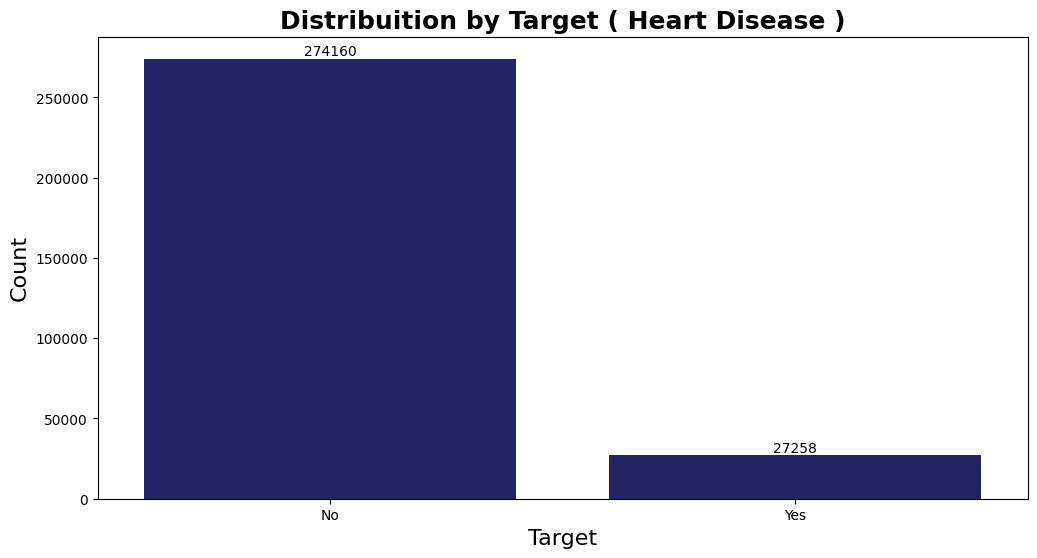

In [251]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Target ( Heart Disease )', fontsize=18, fontweight='bold')
ax = sns.countplot(x=data['HeartDisease'], color='midnightblue')
plt.xlabel('Target', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

We can see imbalancement in our target class, we will balance the class later on

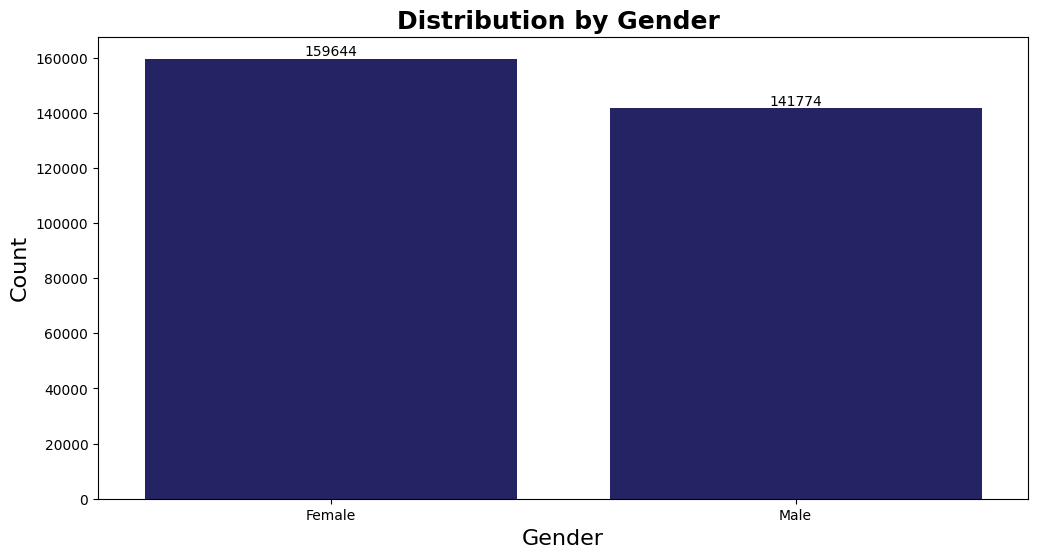

In [252]:
plt.figure(figsize=(12,6))
plt.title('Distribution by Gender ', fontsize=18, fontweight='bold')
ax = sns.countplot(x=data['Sex'], color='midnightblue')
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

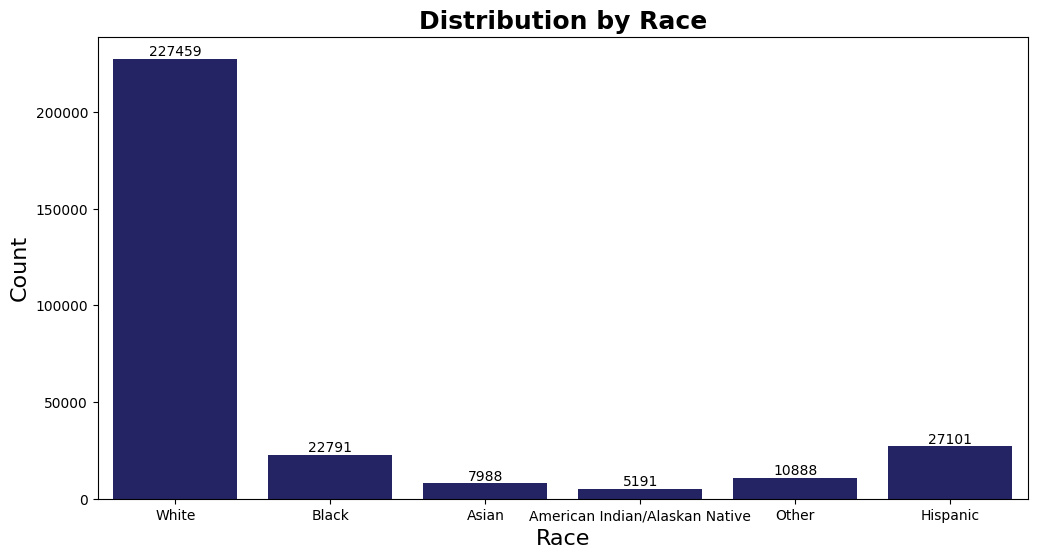

In [253]:
plt.figure(figsize=(12,6))
plt.title('Distribution by Race', fontsize=18, fontweight='bold')
ax = sns.countplot(x=data['Race'], color='midnightblue')
plt.xlabel('Race', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

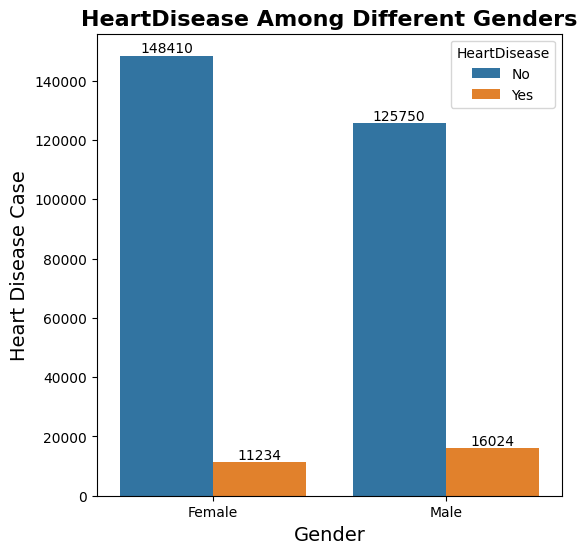

In [254]:

plt.figure(figsize=(6, 6))

# Plot countplot
ax = sns.countplot(data=data, x='Sex', hue='HeartDisease')

# Customize plot

ax.set_title("HeartDisease Among Different Genders", fontsize=16,  weight='bold')
ax.set_xlabel("Gender", fontsize=14)
ax.set_ylabel("Heart Disease Case", fontsize=14)

# Add labels to bars
for c in ax.containers:
    ax.bar_label(c)

# Show plot
plt.show()

We can see that Males have higher Heart Disease Case

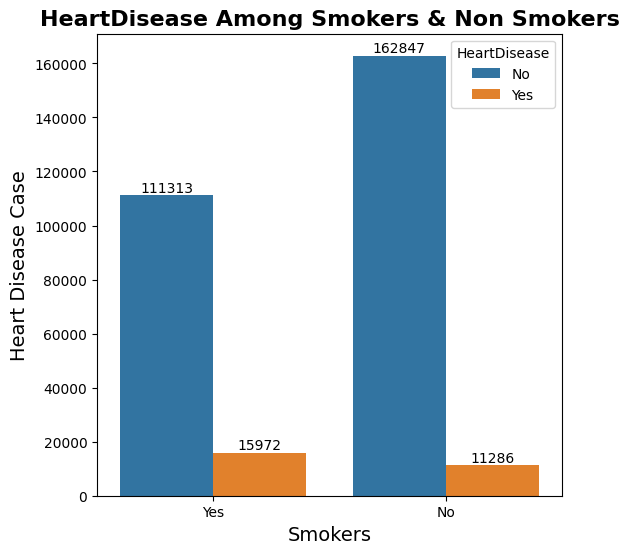

In [255]:

plt.figure(figsize=(6, 6))

# Plot countplot
ax = sns.countplot(data=data, x='Smoking', hue='HeartDisease')

# Customize plot
ax.set_title("HeartDisease Among Smokers & Non Smokers", fontsize=16,  weight='bold')
ax.set_xlabel("Smokers", fontsize=14)
ax.set_ylabel("Heart Disease Case", fontsize=14)

# Add labels to bars
for c in ax.containers:
    ax.bar_label(c)

# Show plot
plt.show()

We can see that people who are frequent smokers has a higher heart disease case

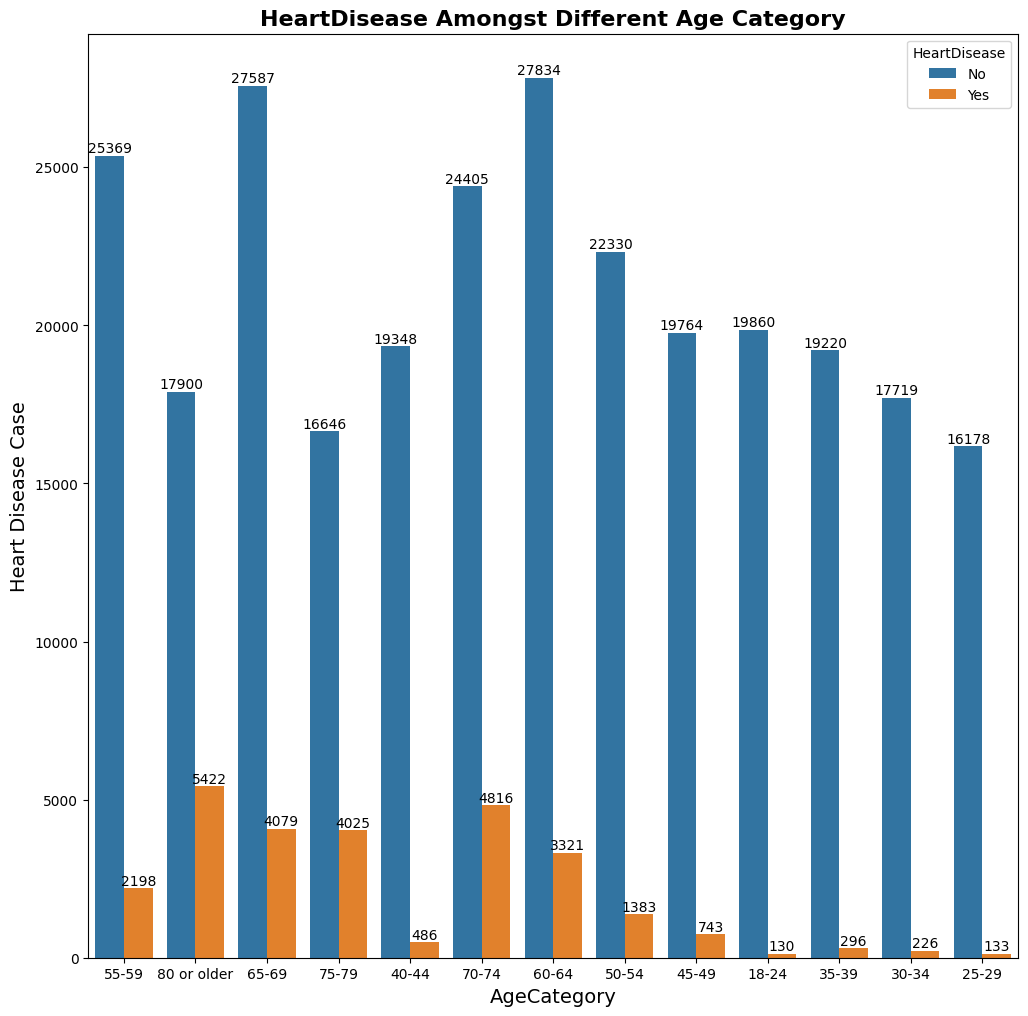

In [256]:
plt.figure(figsize=(12, 12))

# Plot countplot
ax = sns.countplot(data=data, x='AgeCategory', hue='HeartDisease')

# Customize plot
ax.set_title("HeartDisease Amongst Different Age Category", fontsize=16,  weight='bold')
ax.set_xlabel("AgeCategory", fontsize=14)
ax.set_ylabel("Heart Disease Case", fontsize=14)

# Add labels to bars
for c in ax.containers:
    ax.bar_label(c)

# Show plot
plt.show()

We can see older age groups, from 80 to above have high heart disease risk

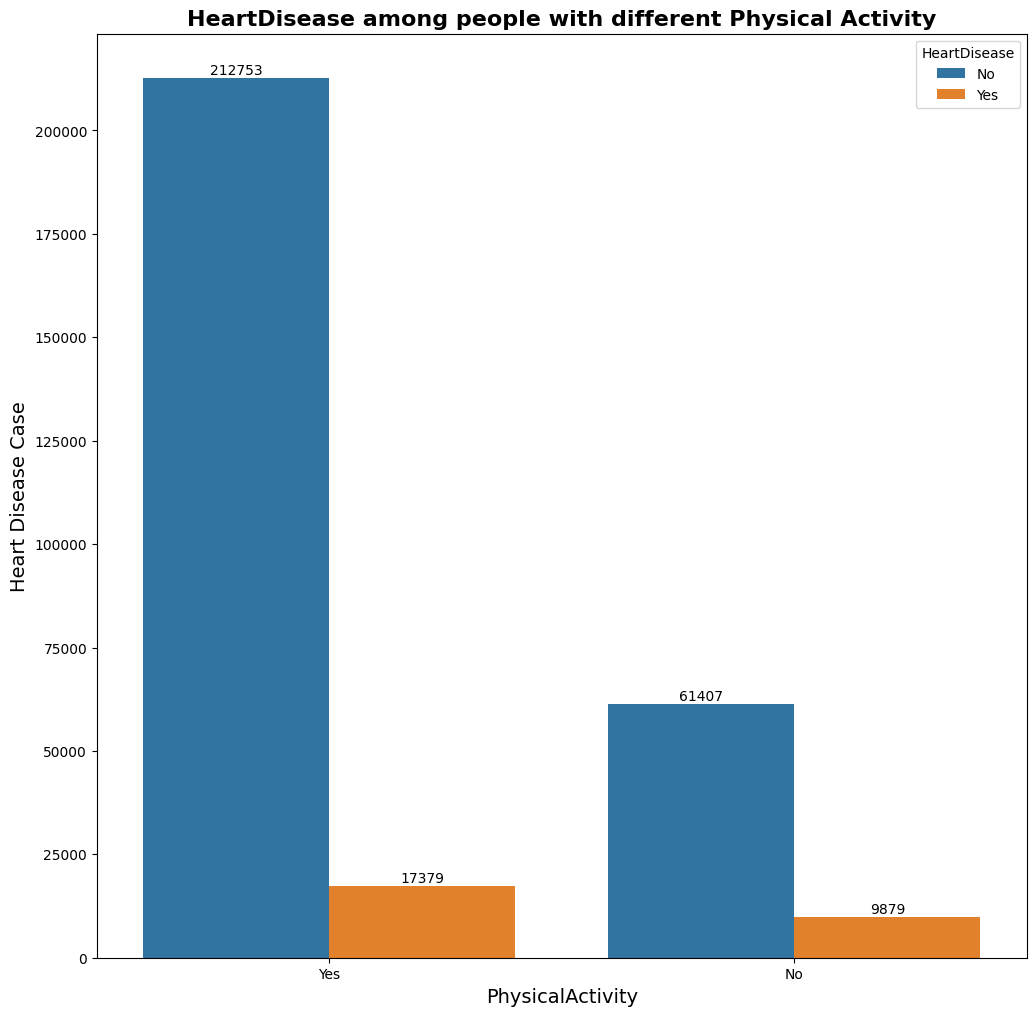

In [257]:
plt.figure(figsize=(12, 12))

# Plot countplot
ax = sns.countplot(data=data, x='PhysicalActivity', hue='HeartDisease')

# Customize plot
ax.set_title("HeartDisease among people with different Physical Activity", fontsize=16,  weight='bold')
ax.set_xlabel("PhysicalActivity", fontsize=14)
ax.set_ylabel("Heart Disease Case", fontsize=14)

# Add labels to bars
for c in ax.containers:
    ax.bar_label(c)

# Show plot
plt.show()

No direct Correlation the No physical activity relates to heart disease case

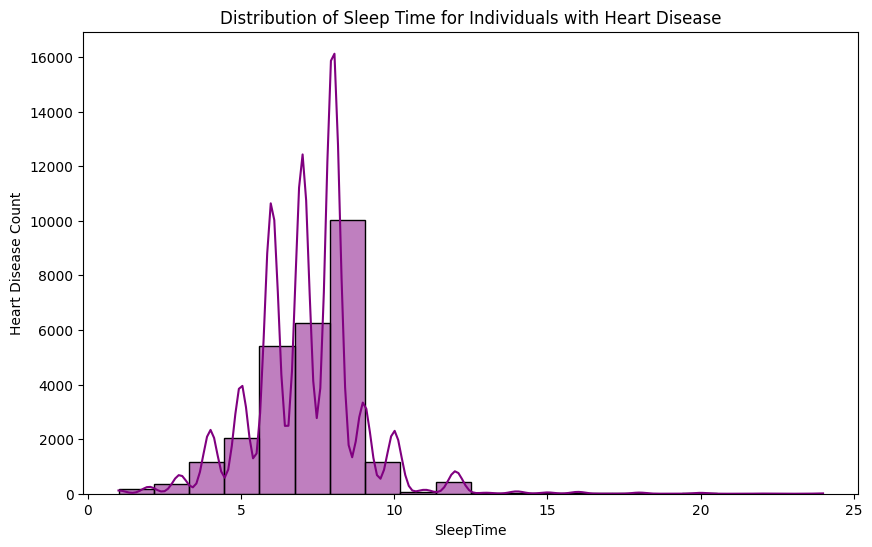

In [258]:
# Filter the dataset to include only individuals with heart disease
heart_disease_df = data[data['HeartDisease'] == 'Yes']

# Plot the distribution of BMI for individuals with heart disease
plt.figure(figsize=(10, 6))
sns.histplot(heart_disease_df['SleepTime'], bins=20, kde=True, color='purple')
plt.xlabel('SleepTime')
plt.ylabel('Heart Disease Count')
plt.title('Distribution of Sleep Time for Individuals with Heart Disease')
plt.show()

Shows individuals with less sleep time has more heart disease cases

In [259]:
# Convert our target class to binary values
replacement_dict = {'Yes': 1, 'No': 0}
data['HeartDisease'] = data['HeartDisease'].replace(replacement_dict)
data['HeartDisease'] = data['HeartDisease'].astype(int)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25180\252334589.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['HeartDisease'] = data['HeartDisease'].replace(replacement_dict)


In [260]:
object_columns = list(data.select_dtypes(include=['object']).columns) # categorical column features
numerical_columns = list(data.select_dtypes(include=['float64']).columns) #numerical column features
object_columns,numerical_columns

(['Smoking',
  'AlcoholDrinking',
  'Stroke',
  'DiffWalking',
  'Sex',
  'AgeCategory',
  'Race',
  'Diabetic',
  'PhysicalActivity',
  'GenHealth',
  'Asthma',
  'KidneyDisease',
  'SkinCancer'],
 ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'])

### Encode & Standardize the Data

In [261]:
data['AgeCategory'].unique(),data['GenHealth'].unique()

(array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
        '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
       dtype=object),
 array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object))

In [262]:

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

age_categories=[['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']]
gen_health_categories = [['Poor','Fair','Good','Very good','Excellent']]


preprocessor = ColumnTransformer(
    transformers=[('encoded_0', OrdinalEncoder(),list(set(object_columns) - {'AgeCategory','GenHealth'})),
                 ('encoded_1',OrdinalEncoder(categories=age_categories),['AgeCategory']),
                 ('encoded_2',OrdinalEncoder(categories=gen_health_categories),['GenHealth'])],
                remainder='passthrough')

# target = data['HeartDisease']
preprocessor.set_output(transform='pandas')
data_encoded =  preprocessor.fit_transform(data)

In [263]:
data_encoded

,encoded_0__Diabetic,encoded_0__Stroke,encoded_0__SkinCancer,encoded_0__DiffWalking,encoded_0__KidneyDisease,encoded_0__Sex,encoded_0__Smoking,encoded_0__Race,encoded_0__Asthma,encoded_0__PhysicalActivity,encoded_0__AlcoholDrinking,encoded_1__AgeCategory,encoded_2__GenHealth,remainder__HeartDisease,remainder__BMI,remainder__PhysicalHealth,remainder__MentalHealth,remainder__SleepTime
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,0.0,7.0,3.0,0,16.60,3.0,30.0,5.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,12.0,3.0,0,20.34,0.0,0.0,7.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,1.0,0.0,9.0,1.0,0,26.58,20.0,30.0,8.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,11.0,2.0,0,24.21,0.0,0.0,6.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,4.0,3.0,0,23.71,28.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301413,1.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,0.0,8.0,1.0,1,27.41,7.0,0.0,6.0
301414,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,0.0,3.0,3.0,0,29.84,0.0,0.0,5.0
301415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,5.0,2.0,0,24.24,0.0,0.0,6.0
301416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0,32.81,0.0,0.0,12.0


### Correlation Matrix

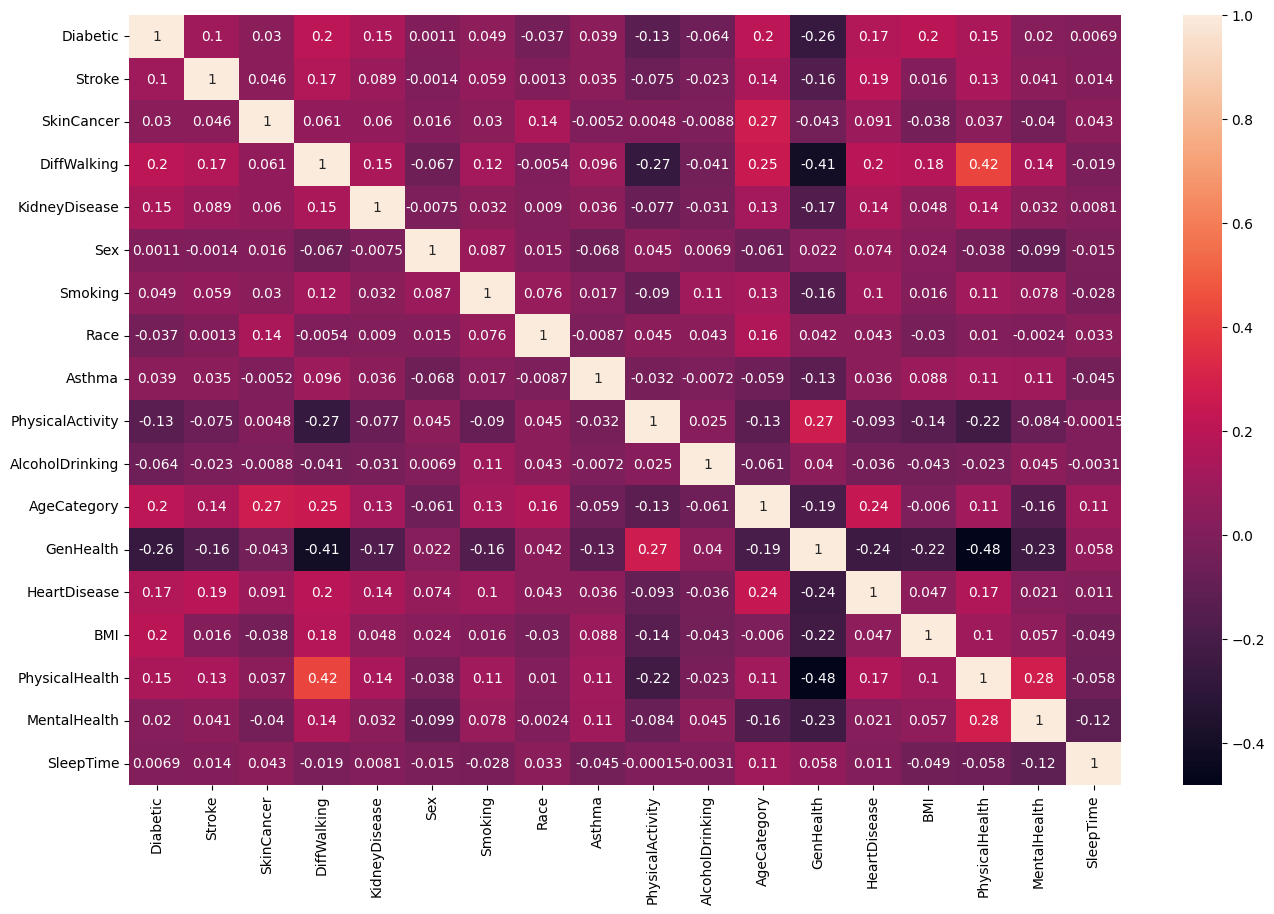

In [264]:
data_encoded.columns = list(map(lambda x: x.replace("scaled__","").replace("encoded_0__","").replace("encoded_1__","").replace("encoded_2__","").replace("remainder__",""),\
                                data_encoded.columns))
plt.figure(figsize=(16, 10))
sns.heatmap(data_encoded.corr(),annot = True)
plt.show()

We can see AgeCategory, Stroke, being most closely correlated to heart disease

In [265]:
from sklearn.model_selection import train_test_split
target = data_encoded["HeartDisease"]
X_encoded = data_encoded.drop(columns=["HeartDisease"])

X_train, X_test, y_train, y_test = train_test_split(X_encoded,target, test_size=0.2,random_state=30)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((241134, 17), (241134,), (60284, 17), (60284,))

## Perform Sampling to Balance Target Class

In [266]:
# perform undersampling and Oversampling to balance out target class
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [267]:
# before balancing
y_train.value_counts()

HeartDisease
0    219365
1     21769
Name: count, dtype: int64

In [268]:
under = RandomUnderSampler(sampling_strategy = 0.1,random_state = 42)
over = SMOTE(sampling_strategy = 1,random_state = 32)
# firt perform under sampling
X_train_resampled, y_train_resampled = under.fit_resample(X_train, y_train,)
# then perfom oversampling
X_train_resampled, y_train_resampled = over.fit_resample(X_train,y_train)

X_train_resampled.shape , y_train_resampled.shape 

((438730, 17), (438730,))

In [269]:
# after balancing
y_train_resampled.value_counts()

HeartDisease
0    219365
1    219365
Name: count, dtype: int64

# Model Training

In [274]:
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
import joblib
import sklearn

In [281]:
# create a classifier model
# create a voting classifier model
xgb = XGBClassifier(max_depth = 7,n_estimators = 1000,learning_rate = 0.1,gamma = 3,early_stopping_rounds = 10,objective="binary:logistic",eval_metric='error',)
rfc = RandomForestClassifier(max_depth = 6,n_estimators = 600)
#  soft voting technique
sklearn.set_config(enable_metadata_routing=True)
clf = VotingClassifier(estimators=[('XGB',xgb),('RF',rfc)],voting='soft',verbose =True)
xgb.set_fit_request(eval_set=True,verbose=True)
# model traininging
clf.fit(X_train_resampled, y_train_resampled,eval_set=[(X_test, y_test)],verbose = False)

[Voting] ...................... (1 of 2) Processing XGB, total=   2.4s
[Voting] ....................... (2 of 2) Processing RF, total= 2.9min


VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=10,
                                            enable_categorical=False,
                                            eval_metric='error',
                                            feature_types=None, gamma=3,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate...x_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1000, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('RF',
                              RandomForestClassifier(max_depth=6,
                                                     n_estimators=600))],
                 verbose=True, voting='soft')

In [284]:
# save the classifier model
import os
model_version = os.urandom(5).hex() 
joblib.dump(clf,f"heart_disease_classifier_{model_version}.pkl")

['heart_disease_classifier_09e44cef72.pkl']

# Get Accuracy on Test & Train Data

In [59]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc

In [285]:
# predicted values test
y_pred_test = clf.predict(X_test)
# predicted values train
y_pred_train = clf.predict(X_train_resampled)

#predicted probabilities test
y_test_pred_proba = clf.predict_proba(X_test)[:, 1]
#predicted probabilities train
y_train_pred_proba = clf.predict_proba(X_train_resampled)[:,1]

### Classification Report Test

In [286]:
# classification report Test
pd.DataFrame(classification_report(y_test,y_pred_test,output_dict = True)).transpose()

,precision,recall,f1-score,support
0,0.936088,0.934465,0.935276,54795.00000
1,0.356913,0.363090,0.359975,5489.00000
accuracy,0.882440,0.882440,0.882440,0.88244
macro avg,0.646500,0.648777,0.647625,60284.00000
weighted avg,0.883352,0.882440,0.882893,60284.00000


### Classification Report Train

In [287]:
# classification report Train
pd.DataFrame(classification_report(y_train_resampled,y_pred_train,output_dict = True)).transpose()

,precision,recall,f1-score,support
0,0.916566,0.936617,0.926483,219365.000000
1,0.935199,0.914740,0.924857,219365.000000
accuracy,0.925679,0.925679,0.925679,0.925679
macro avg,0.925882,0.925679,0.925670,438730.000000
weighted avg,0.925882,0.925679,0.925670,438730.000000


Text(95.72222222222221, 0.5, 'Actual Value')

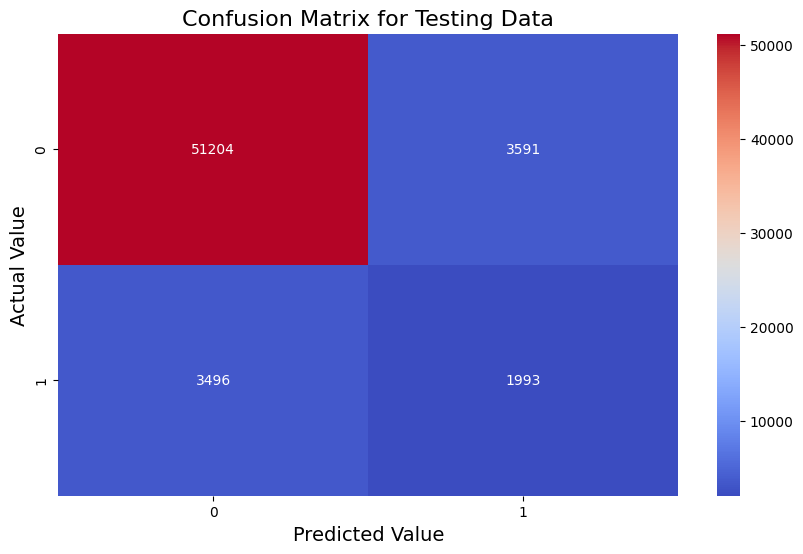

In [288]:
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(10,6))
plt.title('Confusion Matrix for Testing Data', fontsize=16)
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)

Text(95.72222222222221, 0.5, 'Actual Value')

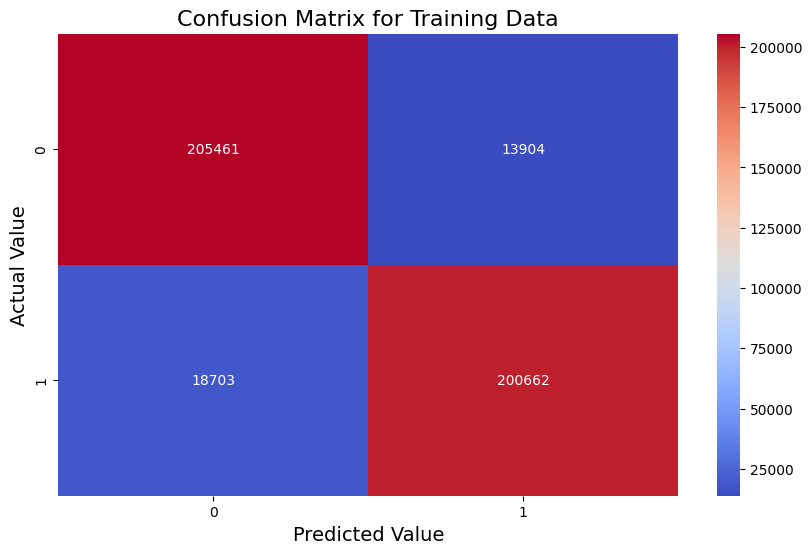

In [289]:
cm = confusion_matrix(y_train_resampled, y_pred_train)

plt.figure(figsize=(10,6))
plt.title('Confusion Matrix for Training Data', fontsize=16)
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)

ROC AUC: 0.83


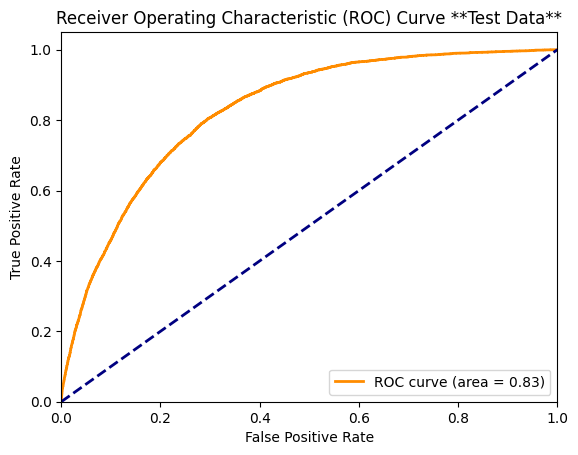

In [290]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f'ROC AUC: {roc_auc:.2f}')

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_value = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve **Test Data**')
plt.legend(loc="lower right")
plt.show()

ROC AUC: 0.98


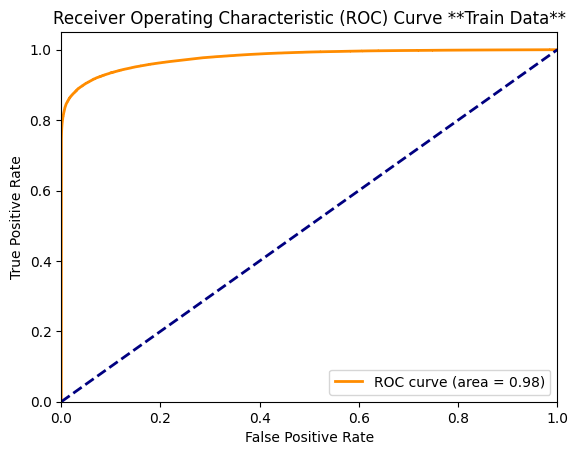

In [291]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_train_resampled, y_train_pred_proba)
print(f'ROC AUC: {roc_auc:.2f}')

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_train_resampled, y_train_pred_proba)
roc_auc_value = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve **Train Data**')
plt.legend(loc="lower right")
plt.show()